In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.datasets import load_iris, load_wine
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [3]:
iris = load_iris()
X = iris.data

In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

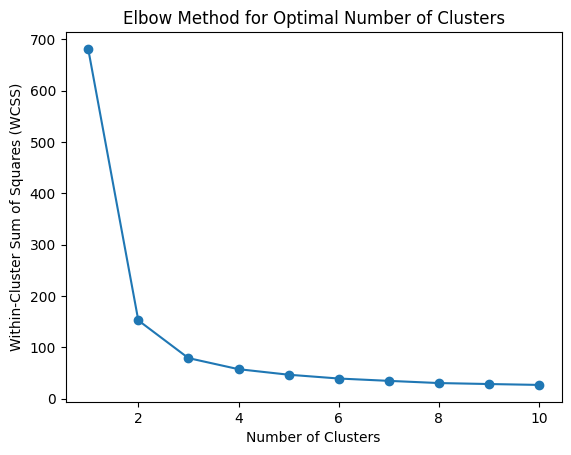

In [5]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

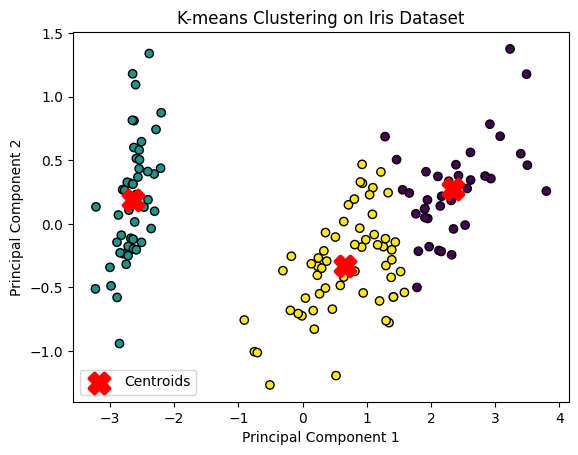

In [6]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualize the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', edgecolor='k')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, linewidths=3, color='red', label='Centroids')
plt.title('K-means Clustering on Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

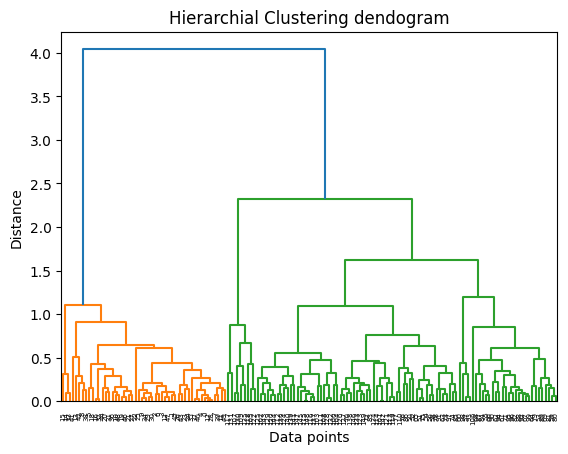

In [8]:
linkage_matrix=linkage(X_pca , method= 'average')

dendrogram(linkage_matrix)
plt.title('Hierarchial Clustering dendogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

Text(0, 0.5, 'Component 2')

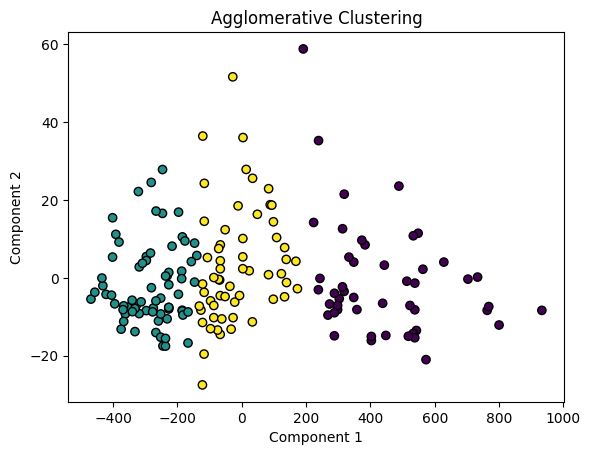

In [15]:
data= load_wine().data
pca2= PCA(n_components=2)
data_pca= pca2.fit_transform(data)
agg_cluster=AgglomerativeClustering(n_clusters=3)
agg_labels=agg_cluster.fit_predict(data_pca)

plt.scatter(data_pca[:,0], data_pca[:,1], c= agg_labels, cmap='viridis', edgecolors='k')
plt.title('Agglomerative Clustering')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

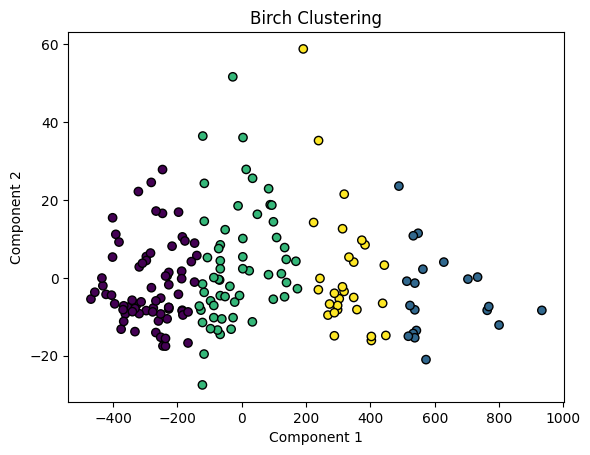

In [20]:
birch_cluster=Birch(threshold=0.5, n_clusters=4)
birch_labels=birch_cluster.fit_predict(data_pca)

plt.scatter(data_pca[:,0], data_pca[:,1], c= birch_labels, cmap='viridis', edgecolors='k')
plt.title('Birch Clustering')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()